In [243]:
import networkx as nx
import re
import gensim
import logging
import pandas as pd
from gensim.models import word2vec
import matplotlib.pyplot as plt
from matplotlib import style
from networkx.algorithms import community


In [244]:
def w2v():
    # скачиваем модель
    # urllib.request.urlretrieve(
    #    "http://rusvectores.org/static/models/rusvectores2/\
    #    ruscorpora_mystem_cbow_300_2_2015.bin.gz",
    #    "ruscorpora_mystem_cbow_300_2_2015.bin.gz")
    m = 'ruscorpora_mystem_cbow_300_2_2015.bin.gz'
    if m.endswith('.vec.gz'):
        model = \
            gensim.models.KeyedVectors.load_word2vec_format(m, binary=False)
    elif m.endswith('.bin.gz'):
        model = \
            gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)
    else:
        model = \
            gensim.models.KeyedVectors.load(m)
    return model


In [245]:
def printer(title, d):
    print(title)
    for keys, values in d.items():
        print(keys, values)
    print('\n')


In [246]:
def neighbour_finder(initial, G):
    neighbours = []
    model = w2v()
    for item in initial:
        if item in model:
            for i in model.most_similar(positive=[item]):
                if i[0] not in initial \
                        and i[0] not in neighbours and i[1] >= 0.5:
                    # слова одной части речи
                    r = re.search('.+?_S', i[0])
                    if r:
                        G.add_node(i[0])
                        G.add_edge(item, i[0])
                        neighbours.append(i[0])
        else:
            print('NO %s in the model' % item)
    return neighbours


In [247]:
def graph():
    flowers = ['ромашка_S', 'роза_S', 'тюльпан_S']
    G = nx.Graph()
    G.add_nodes_from(flowers)
    first_neighbours = neighbour_finder(flowers, G)
    neighbour_finder(first_neighbours, G)
    return G


In [248]:
def analysis(G):

    print('Number of nodes:', G.number_of_nodes())
    print('Number of edges:', G.number_of_edges())
    print('Radius:', nx.radius(G))
    print('Diameter:', nx.diameter(G))
    print('Correlation coefficient:',
          nx.degree_pearson_correlation_coefficient(G))
    print('Density:', nx.density(G))
    print('\n')
    printer('Degree centrality:', nx.degree_centrality(G))
    printer('Eigenvector centrality:', nx.eigenvector_centrality_numpy(G))
    printer('Closeness centrality:', nx.closeness_centrality(G))
    printer('Betweenness centrality:', nx.betweenness_centrality(G))

    print('Average clustering:', nx.average_clustering(G))
    print('Transitivity:', nx.transitivity(G))


In [249]:
def communities(G):
    com = community.greedy_modularity_communities(G)
    return com


In [251]:
communities(G)

[frozenset({'вьюнок_S',
            'донник_S',
            'клевер_S',
            'маргаритка_S',
            'одуванчик_S',
            'полынь_S',
            'резеда_S',
            'ромашка_S',
            'сурепка_S',
            'фиалка_S'}),
 frozenset({'астра_S',
            'георгин_S',
            'герань_S',
            'гиацинт_S',
            'дросида_S',
            'кувшинка_S',
            'лилия_S',
            'орхидея_S',
            'роза_S',
            'хризантема_S'}),
 frozenset({'душица_S',
            'мята_S',
            'настой_S',
            'розмарин_S',
            'тимьян_S',
            'чабрец_S',
            'чебрец_S',
            'шалфей_S'}),
 frozenset({'гладиолус_S',
            'ирис_S',
            'нарцисс_S',
            'незабудка_S',
            'олеандр_S',
            'первоцвет_S',
            'пион_S',
            'тюльпан_S'}),
 frozenset({'жасмин_S',
            'ландыш_S',
            'левкой_S',
            'магнолия_S',
       

In [250]:
Слова объединялись по сходству сфер использования (для составления букетов или применения в кулинарии/лечебных целях), внешнего вида цветков (маленькие белые цветки) или характерному запаху (группа 8).

Слова первой группы - либо полевые цветы, либо медоносные.
Вторая группа - "подарочные" цветы, котореы можно встретить в букете чаще всего.
Третья группа - пахучие травы-специи, в том числе те, которые используются в кулинарии.
Четвертая - цветы с крупными или яркими бутонами и необычными названиями.
Пятая - цветы с мелкими (белыми) пахучими цветками.
Шестая - цветы с необычными названиями, комнатные, садовые цветы.
Седьмая - слова, относящиеся к любым цветам.
Восьмая - пахучие полевые цветы.

SyntaxError: invalid syntax (<ipython-input-250-8e90c3ba41ca>, line 1)

In [252]:
# size - degree centrality
# colour - communities


def visualisation(G):
    style.use('ggplot')
    colors = ['#fffeb6', '#cf6275',
              '#9ffeb0', '#d6b4fc', '#fcc006', '#fa5ff7', '#5cac2d', '#ffb2d0']
    labels = ['field flowers', 'holiday flowers', 'spices', 'big buds',
              'white little flowers', 'rare\weird flowers', 'flowers names',
              'smelling']
    colormap = []
    label = []
    dc = nx.degree_centrality(G)
    com = community.greedy_modularity_communities(G)
    n = len(com)
    for node in dc.keys():
        for i in range(0, n):
            if node in com[i]:
                colormap.append(colors[i])
                label.append(labels[i])
    pos = nx.spring_layout(G, k=0.75)
    nx.draw_networkx_nodes(G, pos, nodelist=dc.keys(),
                           node_size=[v*1000 for v in dc.values()],
                           node_color=colormap)
    nx.draw_networkx_edges(G, pos, edge_color='#9af764')
    nx.draw_networkx_labels(G, pos, with_labels=True,
                            font_weight='light', font_size=8.5, label=label)

    plt.axis('off')
#     plt.legend(labels)
    plt.show()


c:\users\annap\miniconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
c:\users\annap\miniconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Number of nodes: 58
Number of edges: 57
Radius: 4
Diameter: 8
Correlation coefficient: -0.31813750341223723
Density: 0.034482758620689655


Degree centrality:
ромашка_S 0.15789473684210525
роза_S 0.10526315789473684
тюльпан_S 0.05263157894736842
цветок_S 0.10526315789473684
маргаритка_S 0.03508771929824561
душица_S 0.14035087719298245
донник_S 0.07017543859649122
одуванчик_S 0.017543859649122806
тысячелистник_S 0.07017543859649122
ландыш_S 0.12280701754385964
фиалка_S 0.03508771929824561
флокс_S 0.10526315789473684
хризантема_S 0.05263157894736842
пион_S 0.07017543859649122
лилия_S 0.05263157894736842
георгин_S 0.03508771929824561
гиацинт_S 0.017543859649122806
ирис_S 0.05263157894736842
незабудка_S 0.017543859649122806
букет_S 0.017543859649122806
цветочек_S 0.017543859649122806
букетик_S 0.017543859649122806
лепесток_S 0.017543859649122806
вьюнок_S 0.017543859649122806
шалфей_S 0.017543859649122806
мята_S 0.017543859649122806
чабрец_S 0.017543859649122806
настой_S 0.01754385964912280

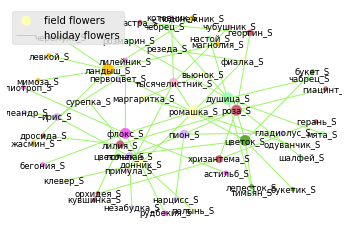

In [253]:
def main():
    G = graph()
    analysis(G)
    communities(G)
    visualisation(G)

if __name__ == "__main__":
    main()
